# Predicting Type 2 Diabetes with Machine Learning

Determining type 2 diabetes risk with a variety of features such as diet and exercise. 

Data Science Approach:
1. Prediction Challenge
2. Gather and Clean Data
3. Data Analysis
4. Feature Variables and Target
5. Build Machine Learning Model
6. Finetune process
7. Deploy

## 1. Prediction Challenge

Can we predict diabetes based off certain variables, such as hospital patient data?

## 2. Gather Data

Data was originally published by the CDC via the Behavioral Risk Factor Surveillance System(2011-2015). License: CC0: Public Domain 
https://www.cdc.gov/brfss/annual_data/annual_data.htm

Data is hosted on kaggle.com at https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset
Kaggle data set: License: CC0: Public Domain

## 3. Data Analysis
Goal: 85% Accuracy. 
    If we meet the goal, we will proceed with building the prevention program

## 4. Feature Variables and Target


##### Features/Variables:  
(1 is yes, unless otherwise specified as a range)

* blood pressure (high)
* cholesterol (high)
* smoking
* diabetes
* obesity
* age (1 is 18, incremented by 5 years. So 2 is 23, 3 is 28, etc...13 is 80 and older)
* sex     [Female: 0, Male: 1]
* race
* diet
* exercise
* alcohol consumption
* BMI
* Household Income
* Marital Status
* Sleep
* Time since last checkup
* Education
* Health care coverage
* Mental Health

**Response Variable / Dependent Variable:


## Tools

Tools to be used: Pandas, Matplotlib, Numpy

In [1]:
# importing tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Shows plots inside the notebook
%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, plot_roc_curve
from sklearn.naive_bayes import MultinomialNB


In [2]:
df = pd.read_csv("./csv_files/diabetes_binary_health_indicators_BRFSS2015.csv")
df.shape

(253680, 22)

## Data Analysis

In [6]:
df.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


<AxesSubplot:>

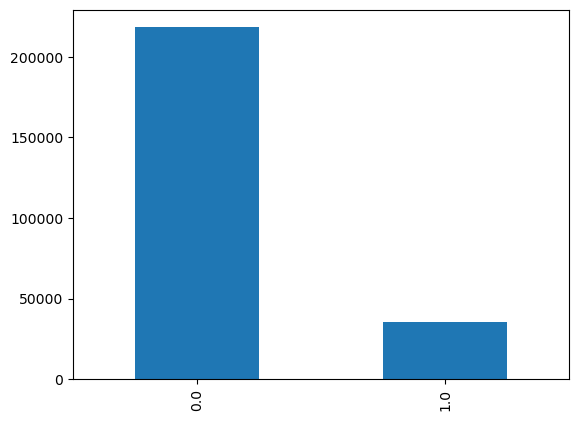

In [7]:
# Are results balanced? No. 
df["Diabetes_binary"].value_counts().plot(kind="bar")

In [8]:
# Missing Values? No missing values. 
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [9]:
#Describe data
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


### Diabetes according to age

<AxesSubplot:>

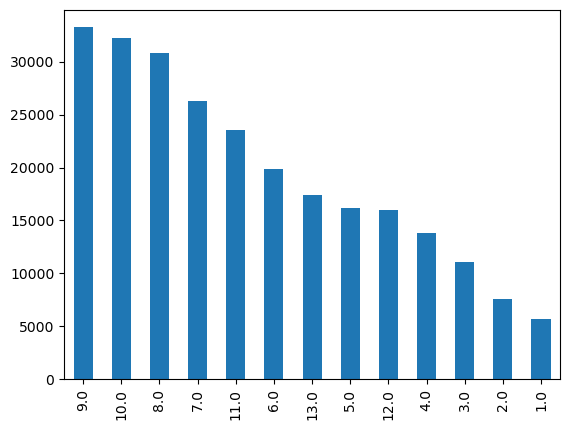

In [10]:
df.Age.value_counts().plot(kind="bar")

In [11]:
pd.crosstab(df.Diabetes_binary, df.Age)

Age,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
Diabetes_binary,,,,,,,,,,,,,
0.0,5622,7458,10809,13197,15106,18077,23226,26569,27511,25636,18392,12577,14154
1.0,78,140,314,626,1051,1742,3088,4263,5733,6558,5141,3403,3209


In [12]:
gender_ct = pd.crosstab(df.Diabetes_binary, df.Sex, normalize= 'columns')
gender_ct

Sex,0.0,1.0
Diabetes_binary,,
0.0,0.870321,0.848397
1.0,0.129679,0.151603


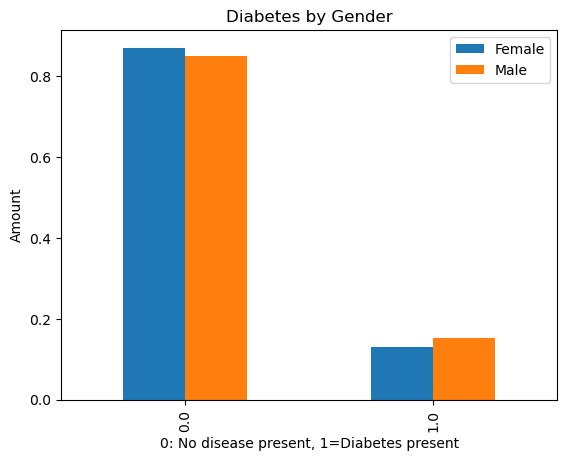

In [15]:
gender_plt = gender_ct.plot(kind="bar", subplots=False)
plt.title("Diabetes by Gender")
plt.xlabel("0: No disease present, 1=Diabetes present")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt;

In [17]:
# df["HighChol"].value_counts()
df["HighChol"].value_counts()

0.0    146089
1.0    107591
Name: HighChol, dtype: int64

### BMI vs Cholesterol for Diabetes

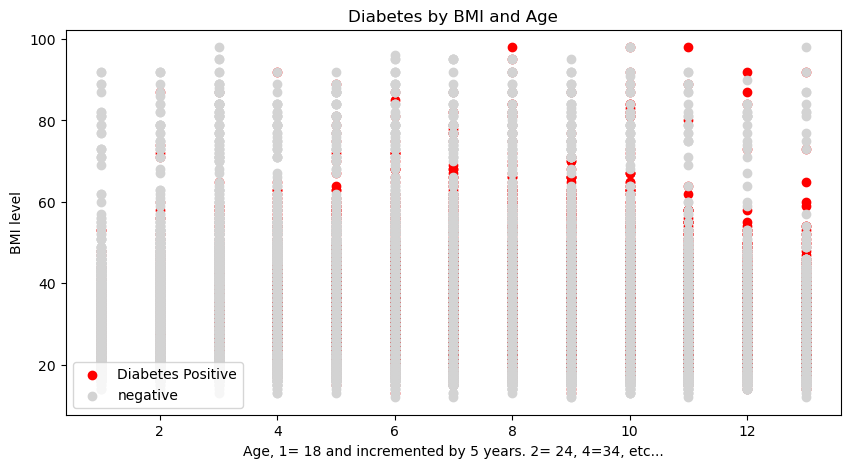

In [18]:
plt.figure(figsize=(10,5))
#Positive results
plt.scatter(df.Age[df.Diabetes_binary==1],
           df.BMI[df.Diabetes_binary==1], c = 'red')
# Negative Diabetes
plt.scatter(df.Age[df.Diabetes_binary==0],
           df.BMI[df.Diabetes_binary==0],
           c="lightgrey")
plt.title("Diabetes by BMI and Age")
plt.xlabel("Age, 1= 18 and incremented by 5 years. 2= 24, 4=34, etc...")
plt.ylabel("BMI level")
plt.legend(["Diabetes Positive", "negative"], loc='lower left')

plt;

<AxesSubplot:ylabel='Frequency'>

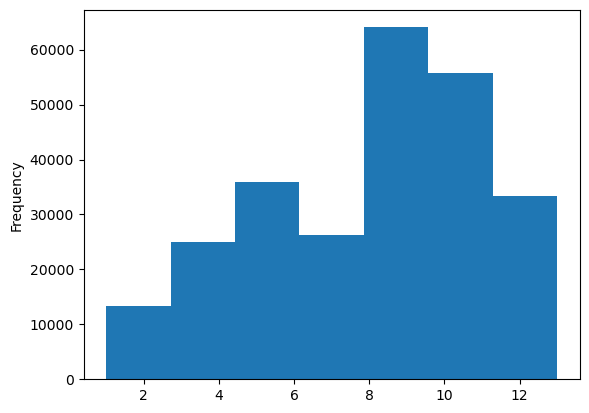

In [19]:
df.Age.plot.hist(bins=7)

### Physically Active each week compared to Diabetes Diagnosis
Do you exercise each week? --> PhysActivity 
* 0 = No
* 1 = Yes
##### Results
* 0: If not active, 1 out of 3 indicates diabetes type 2
* 1: If active, 1 out of 10 indicates diabetes type 2

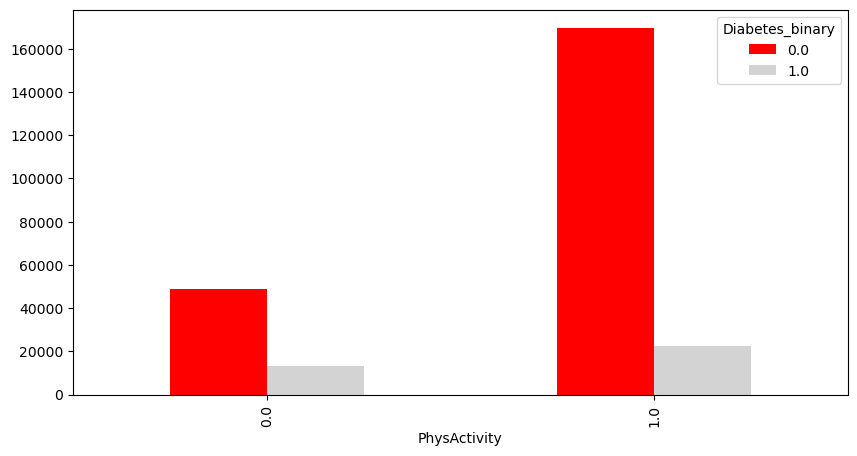

In [32]:
ct_phys_hlth = pd.crosstab(df.PhysActivity, df.Diabetes_binary)
ct_phys_hlth.plot(kind="bar", figsize=(10,5),color = ["red", "lightgrey"]);

### Income compared to Diabetes Diagnosis
Household income.

* 1 = Less than $10,000.
* 2 = 10-20
* 3 = 20-35
* 4 = 35-45
* 5 = 45-55
* 6 = 55-65
* 7 = 65-75
* 8 = 75--> 

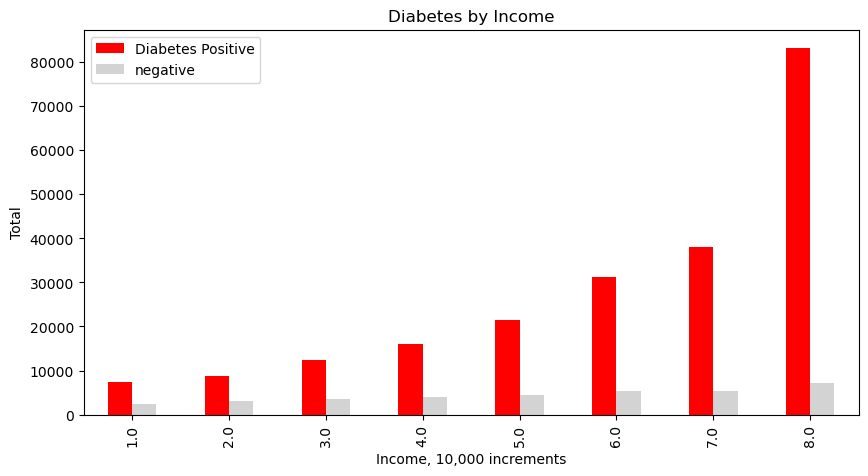

In [33]:
ct_phys_hlth = pd.crosstab(df.Income, df.Diabetes_binary)
ct_phys_hlth.plot(kind="bar", figsize=(10,5),color = ["red", "lightgrey"]);
plt.title("Diabetes by Income")
plt.xlabel("Income, 10,000 increments")
plt.ylabel("Total")
plt.legend(["Diabetes Positive", "negative"], loc='upper left');

In [44]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


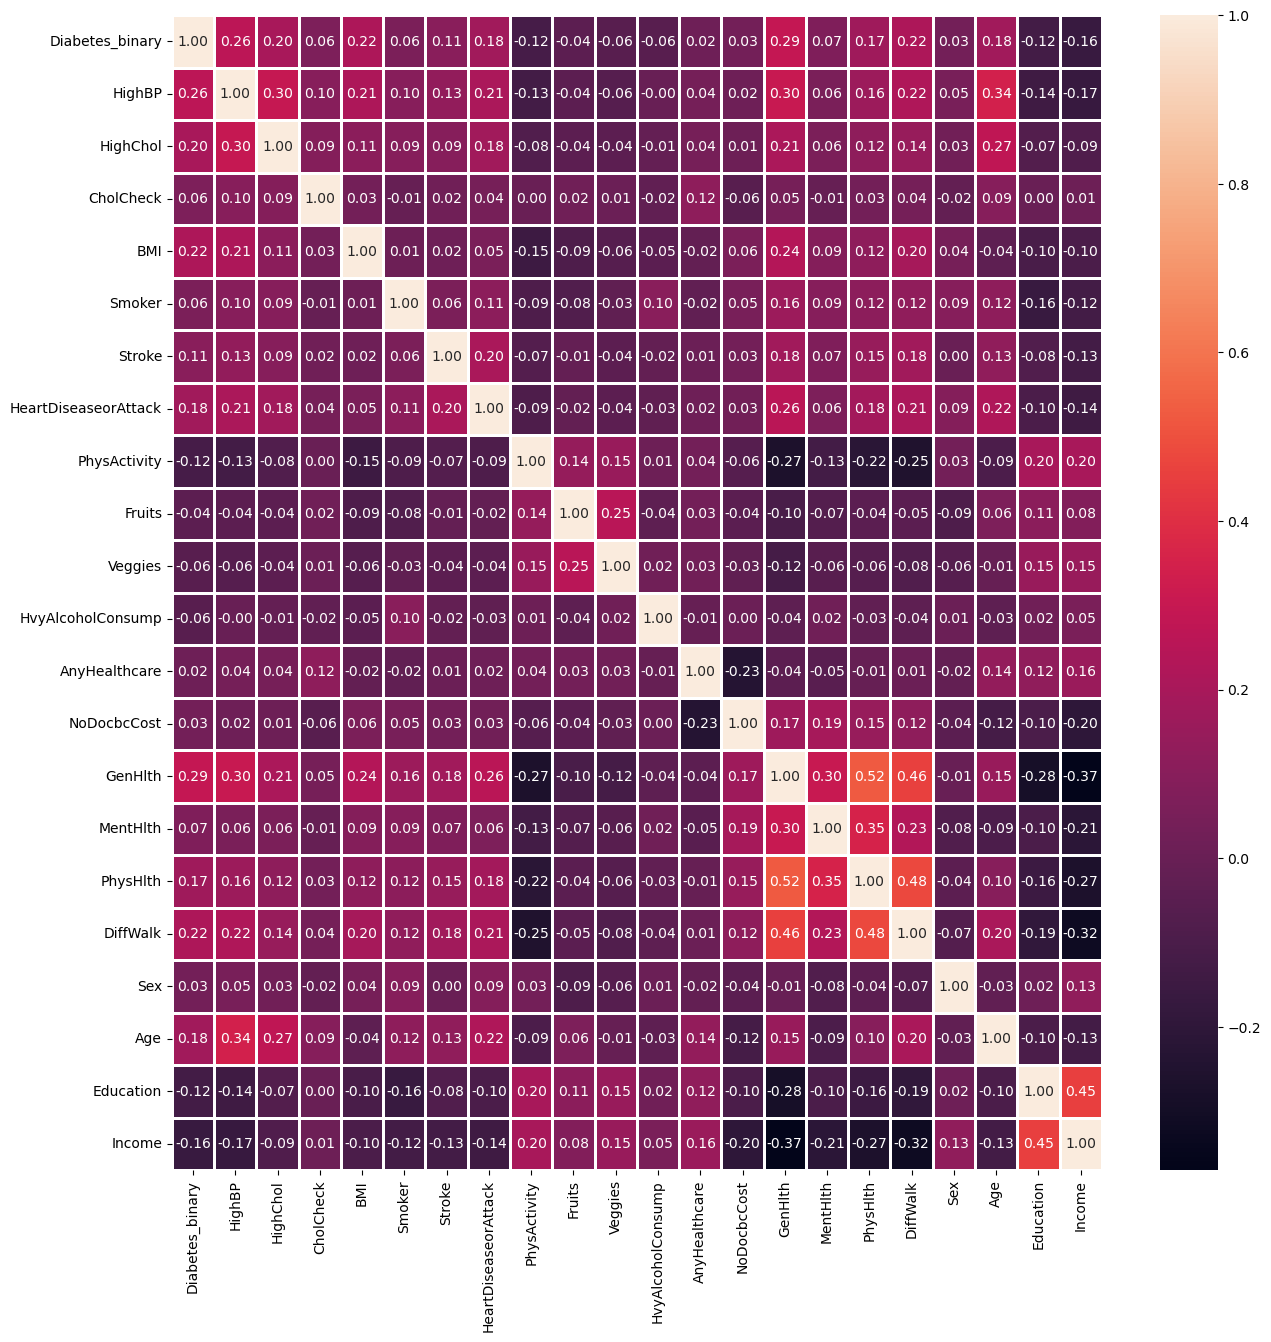

In [45]:
correlation_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(correlation_matrix, annot=True, linewidth=1,fmt=".2f")

### Prep Data for Model

In [34]:
# Create training and test splits
X = df.drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]
np.random.seed(27)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Build Model

Model type attempts:

1. Logistic Regression
2. RFC

In [35]:
# Create model dictionary
models = {"Logistic Regression": LogisticRegression(),
         "RandomForestClassifier": RandomForestClassifier()}

# Fit Model
def process_models(models, X_train, X_test, y_train, y_test):
    # Create random seed
    np.random.seed(27)
    model_scores = {}
    for name, model in models.items():
        # Fit model
        model.fit(X_train, y_train)
        #Evaluate model and save results
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [36]:
scores = process_models(models = models, 
                        X_train = X_train, 
                        X_test = X_test, 
                        y_train = y_train, 
                        y_test = y_test)
scores

/Users/johnnymarkfilms/Desktop/capstone/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.860789183222958,
 'RandomForestClassifier': 0.858167770419426}

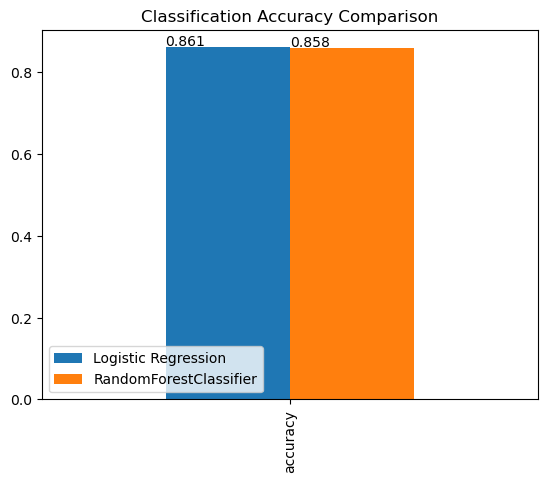

In [37]:

compare_models = pd.DataFrame(scores, index=["accuracy"])
# Create a bar chart of the data in `compare_models`
ax = compare_models.plot.bar(title="Classification Accuracy Comparison")

# Label the bars with their exact values
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 3)), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.legend(loc="lower left")
# Show the plot
plt.show()


# Improve Models

In [38]:
# LogisticRegression hyperparameter

lr_grid = {"C": np.logspace(-4,4,20),
           'penalty' : ['l1', 'l2'],
          "solver": ['lbfgs', 'liblinear'],
           'class_weight': ["balanced", None],
          'max_iter' : [100, 1000]
          }

#Linear SVC hyperparameter
linear_svc_gr = {'C': [0.1, 1, 10, 100, 1000], 
              'class_weight': ["balanced"]
              }


In [42]:
# Tune LogisticRegression
np.random.seed(27)

rs_lr = RandomizedSearchCV(LogisticRegression(), 
                          param_distributions=lr_grid, 
                            cv=5,
                          n_iter=10,
                          verbose=True)

### Grid Search Model Tuning

In [43]:
lr_grid2 = {"C": np.logspace(-4,4,30),
           'penalty' : ['l1'],
          "solver": ['liblinear'],
          'max_iter' : [100]
          }
grid_search_lr = GridSearchCV(LogisticRegression(),
                        param_grid=lr_grid2,
                        cv=5,
                        verbose=True)
# Fit model
grid_search_lr.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'max_iter': [100], 'penalty': ['l1'],
                         'solver': ['liblinear']},
             verbose=True)

In [47]:
grid_search_lr.best_params_

{'C': 0.01610262027560939,
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [48]:
grid_search_lr.score(X_test, y_test)

0.8626222011983601

In [49]:
y_preds = grid_search_lr.predict(X_test)

In [50]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     43560
         1.0       0.55      0.15      0.23      7176

    accuracy                           0.86     50736
   macro avg       0.71      0.56      0.58     50736
weighted avg       0.83      0.86      0.83     50736



### New model with best parameters - Cross Evaluation

In [51]:
# Classifier with best parameters

clf = LogisticRegression(C= 0.01610262027560939,
                         penalty= 'l1',
                         max_iter= 100,
                         solver= 'liblinear')


In [52]:
def crossValidator(score_metric):
    crossv_score = cross_val_score(clf, 
                                  X, 
                                  y, 
                                  cv=5, 
                                  scoring = score_metric)
    average_score = np.mean(crossv_score)
    print(f"{score_metric}: {average_score}") # return average of 5 cross eval scores
    return average_score

In [54]:
# Get cross validated data and metrics
metrics = ["accuracy", "precision", "recall", "f1"]
scores = {}
for metric in metrics:
    score = crossValidator(metric)
    scores[metric] = score


accuracy: 0.8632489750867235
precision: 0.5373290174600893
recall: 0.14799427666227205
f1: 0.23140784665332056


In [55]:
# cross_val_metrics.plot.bar()
cross_val_metrics = pd.DataFrame({"accuracy": scores["accuracy"], 
                                 "precision": scores["precision"],
                                  "recall": scores["recall"],
                                  "f1": scores["f1"],
                                 }, index=[0])


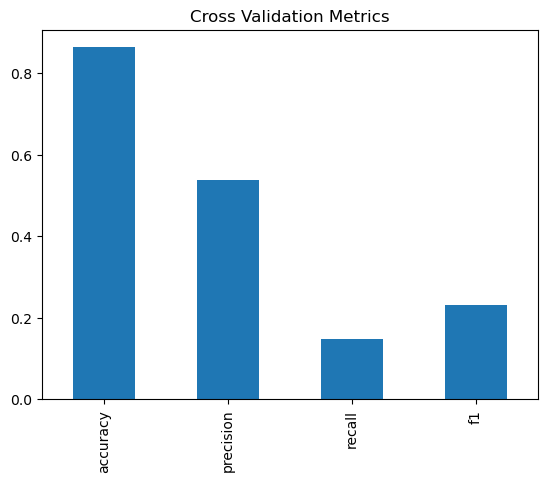

In [56]:
cross_val_metrics.T.plot.bar(legend=False, title="Cross Validation Metrics");

/Users/johnnymarkfilms/Desktop/capstone/env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


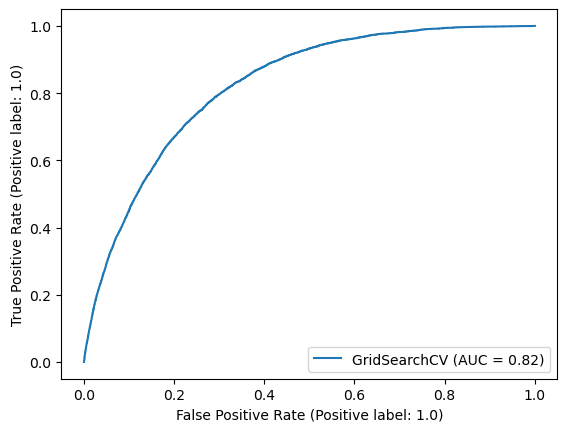

In [57]:
# ROC Curve plot with AUC score 
plot_roc_curve(grid_search_lr, X_test, y_test);

### Feature Analysis

Which variables/features influence the classification result the most?

In [58]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [59]:
df = df.reindex(columns = [col for col in df.columns if col != 'Diabetes_binary'] + ['Diabetes_binary'])
X = df.drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]
np.random.seed(27)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [60]:
# Best Performing Classified Logistic Regression
clf.fit(X_train, y_train);

In [61]:
# .drop("Diabetes_binary", axis=1)
feature_performance = dict(zip(df, list(clf.coef_[0])))
feature_performance

{'HighBP': 0.7457918859952424,
 'HighChol': 0.5716048204559586,
 'CholCheck': 0.6840480083481919,
 'BMI': 0.05875175764031608,
 'Smoker': -0.01207172677502795,
 'Stroke': 0.11271465001661513,
 'HeartDiseaseorAttack': 0.20662248090234353,
 'PhysActivity': -0.05932190061696324,
 'Fruits': -0.047505949035877904,
 'Veggies': -0.027430475817694394,
 'HvyAlcoholConsump': -0.6412231310480037,
 'AnyHealthcare': 0.0,
 'NoDocbcCost': 0.0,
 'GenHlth': 0.5165024948476349,
 'MentHlth': -0.003593534664997929,
 'PhysHlth': -0.006602417531064773,
 'DiffWalk': 0.12746950162347948,
 'Sex': 0.23638715159720058,
 'Age': 0.11859968739440095,
 'Education': -0.045002966630554225,
 'Income': -0.05320599008985855}

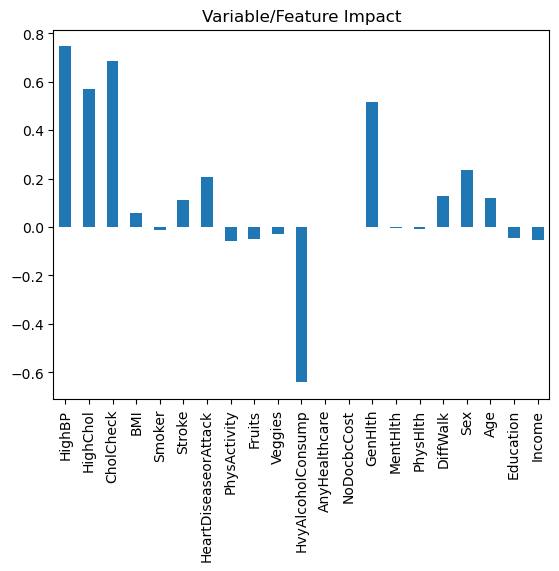

In [62]:
feature_performance_sorted_df = pd.DataFrame(feature_performance, index=[0])
feature_performance_sorted_df.T.plot.bar(legend=False, title="Variable/Feature Impact");

In [63]:
pd.crosstab(df["HvyAlcoholConsump"], df["Diabetes_binary"])

Diabetes_binary,0.0,1.0
HvyAlcoholConsump,,
0.0,204910,34514
1.0,13424,832


In [64]:
pd.crosstab(df["GenHlth"], df["Diabetes_binary"], normalize=True)

Diabetes_binary,0.0,1.0
GenHlth,,
1.0,0.174074,0.004494
2.0,0.326013,0.025154
3.0,0.245147,0.053047
4.0,0.085856,0.038592
5.0,0.029577,0.018046


In [66]:
y_preds = clf.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     43560
         1.0       0.55      0.15      0.23      7176

    accuracy                           0.86     50736
   macro avg       0.71      0.56      0.58     50736
weighted avg       0.83      0.86      0.83     50736



### Production and Exporting of Final Trained Model

In [67]:
import pickle
pickle.dump(clf, open("clf_logregres_diabetes_classifier.pkl", "wb"))

In [68]:
#Load model back
loaded_model = pickle.load(open("clf_logregres_diabetes_classifier.pkl", "rb"))

In [69]:
loaded_preds = loaded_model.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     43560
         1.0       0.55      0.15      0.23      7176

    accuracy                           0.86     50736
   macro avg       0.71      0.56      0.58     50736
weighted avg       0.83      0.86      0.83     50736

